higm

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import copy
import numpy.linalg as lin

In [5]:
def generate_3_team_matrix(Shape, team1_size, team2_size):
    if Shape < team1_size+team1_size or Shape< team1_size or Shape< team2_size:
        raise ValueError
    
    team3_size= Shape - team1_size - team2_size
    array= np.ones(Shape)
    x= np.arange(0, team1_size)
    y= np.arange(team1_size, team1_size+team2_size)
    z= np.arange(team1_size+team2_size, Shape)
    array_ranges= [x,y,z]

    Adj_matrix= np.ones(shape=(Shape, Shape))
    Adj_matrix= -Adj_matrix

    for i in range (0,Shape):
        for j in range (0,Shape):
            if i in array_ranges[0] and j in array_ranges[0]:
                Adj_matrix[i,j]=1
            if i in array_ranges[1] and j in array_ranges[1]:
                Adj_matrix[i,j]=1
            if i in array_ranges[2] and j in array_ranges[2]:
                Adj_matrix[i,j]=1
    

    return Adj_matrix

In [6]:
def count_edges_in_box(matrix, x, y):
    #x and y array like
    count=0
    for i in range(x[0],x[1]):
        for j in range(y[0], y[1]):
            if matrix[i,j]!=0:
                count+=1
    return count

In [7]:
def remove_edges_in_box(matrix, x, y, density):
    Adj= matrix
    count_team= count_edges_in_box(Adj, x, y)

    edges_to_remove= int(np.ceil(count_team* (1-density)))

    for edge in range(edges_to_remove):
        i_del= np.random.randint(x[0], x[1])
        j_del= np.random.randint(y[0], y[1])
        if Adj[i_del, j_del]!=0:
            Adj[i_del,j_del]=0
        count_team= count_edges_in_box(Adj, x, y)
        edges_to_remove= np.ceil(count_team* (1-density/2))
    return Adj


In [8]:
def generate_3_team_matrix_sparse(Shape, team1_size, team2_size, density_matrix):
    
    Adj= generate_3_team_matrix(Shape, team1_size, team2_size)
    # remove intra edges to match density
    x= [0, team1_size]
    y= [team1_size, team1_size+team2_size]
    z= [team1_size+team2_size, Shape]

    array_w_ranges= [x,y,z]
    for i in range(len(array_w_ranges)):
        for j in range(len(array_w_ranges)):
            Adj= remove_edges_in_box(Adj, array_w_ranges[i], array_w_ranges[j], density_matrix[i,j])
    
    return Adj


In [9]:
density_matrix = np.ones(shape=(3,3)) * 0.3

In [10]:
baibhab=[]
for i in range(5):
    baibhab.append(generate_3_team_matrix_sparse(24, 8, 8, density_matrix))

['[1, 1, 0, 1, 1, -1, -1, -1, -1, -1, 1, -1, 0, 1]', '[1, 1, 1, 1, 1, 0, -1, -1, -1, -1, 0, -1, 0, 1]', '[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 0, 1]', '[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 0, -1]', '[0, -1, -1, 1, 0, -1, 0, -1, -1, -1, 1, 1, 1, 1]', '[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 0, -1]', '[1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 0, 1]', '[1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1]', '[1, 0, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1]', '[-1, -1, -1, -1, -1, 0, 1, 1, 1, 1, 0, 1, 0, -1]', '[-1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1]', '[0, 1, 1, -1, 0, 1, 0, 1, 1, 1, -1, -1, -1, -1]', '[0, 1, 1, -1, 0, 1, 0, 1, 1, 1, -1, 0, -1, -1]', '[-1, 0, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1]', '[1, 1, 0, 1, 1, 0, -1, -1, -1, -1, 1, -1, 0, 1]', '[1, -1, 0, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1]', '[0, -1, -1, 1, 0, -1, 0, -1, -1, -1, 1, 0, 1, 1]', '[1, 0, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1]', '[1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1]', '[-1, 1, 

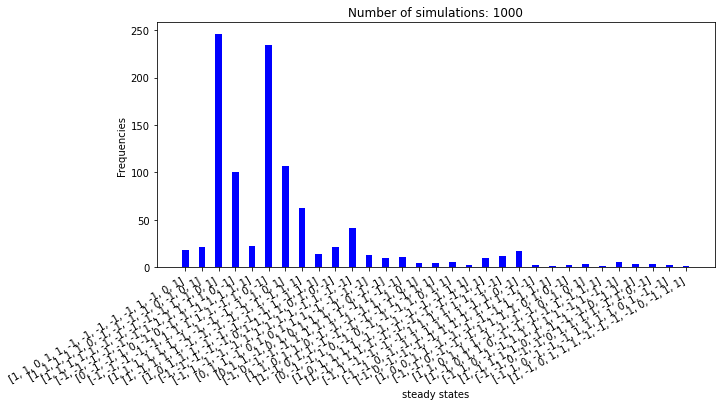

ayeaye!


In [29]:
import three_states_sim
import nteams
import boolean_siml
import team_on_off_label_plot as toolp
density=nteams.density_mat_gen(3,0.3)
adj=nteams.nteam_net(3,[5,5,4],density)[0]
steadys=three_states_sim.steady_states(adj,1000)
ssf=boolean_siml.steady_state_frequency(steadys,adj)
boolean_siml.bar_graph(ssf,"hello")



['t1a_5_o_0_i_0t2a_8_o_0_i_2t3a_11_o_0_i_8', 't1a_0_o_0_i_5t2a_2_o_0_i_8t3a_8_o_0_i_11', 't1a_5_o_0_i_0t2a_5_o_0_i_5t3a_8_o_1_i_10', 't1a_0_o_0_i_5t2a_5_o_0_i_5t3a_10_o_1_i_8', 't1a_1_o_1_i_3t2a_1_o_1_i_8t3a_5_o_1_i_13', 't1a_3_o_1_i_1t2a_8_o_1_i_1t3a_13_o_1_i_5', 't1a_0_o_0_i_5t2a_3_o_2_i_5t3a_10_o_4_i_5', 't1a_5_o_0_i_0t2a_5_o_2_i_3t3a_5_o_4_i_10', 't1a_0_o_3_i_2t2a_5_o_3_i_2t3a_10_o_3_i_6', 't1a_2_o_3_i_0t2a_2_o_3_i_5t3a_6_o_3_i_10'] [149, 134, 248, 225, 126, 92, 6, 12, 3, 5]


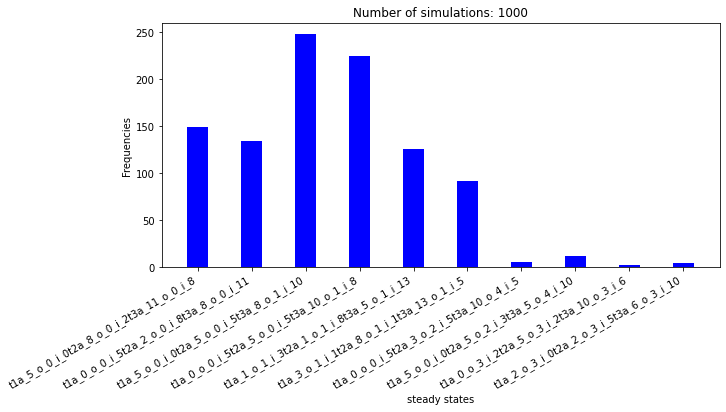

ayeaye!
